# 🚀 Customer Segmentation Analysis Using KMeans (K-Means Clustering) – Full Python Data Science Project

## 📌 Project Overview
This project aims to segment customers based on their demographics, spending, and engagement features.

**We will perform:**

1. Data Exploration
2. Data Cleaning & Preprocessing
3. Feature Engineering
4. Exploratory Data Analysis & Visualization
5. Clustering using KMeans
6. PCA for dimensionality reduction
7. Saving the trained model and scaler

## 📌 Step 1: Import Required Libraries

**We will import all necessary Python libraries for:**

1. Data manipulation (Pandas, NumPy)

2. Visualization (Matplotlib, Seaborn)

3. Machine Learning (Scikit-learn)

4. Model saving (Joblib)

In [417]:
#Import libraries
import pandas as pd
import numpy as np

In [418]:
import matplotlib.pyplot as plt
import seaborn as sns

# 📂 Step 2: Load Dataset

Load the customer segmentation dataset and explore the structure.

In [419]:
#Load dataset
pd.read_csv("customer_segmentation.csv")

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [420]:
import pandas as pd

df = pd.read_csv("customer_segmentation.csv")   # Load dataset
print(df.columns)

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')


In [421]:
df.shape

(2240, 29)

In [422]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [423]:
df.isna()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2236,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2237,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2238,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# 📊 Step 3: Explore the Dataset
Check for missing values and understand basic statistics.

In [424]:
#Check missing values
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [425]:
df.dropna()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [426]:
df.isna().sum().sum()

24

In [427]:
df.dropna(inplace=True)

In [428]:
df.isna().sum().sum()

0

In [429]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,...,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,...,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


# 🧹 Step 4: Data Cleaning & Feature Engineering
Handle missing values, normalize column names, and create new features.

In [430]:
#Normalize column names
df["Education"].value_counts()

Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64

In [431]:
print(df.columns.tolist())

['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']


In [432]:
df["Marital_Status"].value_counts()

Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [433]:
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], dayfirst=True)

In [434]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   object        
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   MntWines             2216 non-null   int64         
 10  MntFruits            2216 non-null   int64         
 11  MntMeatProducts      2216 non-null   int64         
 12  MntFishProducts      2216 non-null   int64         
 13  MntSweetProducts     2216 non-null   i

In [435]:
df["Age"] = 2025 - df["Year_Birth"]

In [436]:
df["Age"]

0       68
1       71
2       60
3       41
4       44
        ..
2235    58
2236    79
2237    44
2238    69
2239    71
Name: Age, Length: 2216, dtype: int64

In [437]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,0,3,11,1,68
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,0,3,11,0,71
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,3,11,0,60
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,0,3,11,0,41
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,3,11,0,44


In [438]:
df["Total_Children"] = df["Kidhome"] + df["Teenhome"]

In [439]:
df["Total_Children"]

0       0
1       2
2       0
3       1
4       1
       ..
2235    1
2236    3
2237    0
2238    1
2239    2
Name: Total_Children, Length: 2216, dtype: int64

In [440]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Total_Children'],
      dtype='object')

In [441]:
spend_cols = ["mintwines", "mntfruits", "mntmeatproduct", "mntfishproduct", "mntsweet;products", "mntgoldprods"]

In [442]:
#Step 1: Normalize all column names (optional but recommended)
df.columns = df.columns.str.lower()

In [443]:
# Step 2: Define spending columns with correct lowercase names
spend_cols = [
    "mntwines",
    "mntfruits",
    "mntmeatproducts",
    "mntfishproducts",
    "mntsweetproducts",
    "mntgoldprods"
]


In [444]:
# Step 3: Create total spending column
df["Total_Spending"] = df[spend_cols].sum(axis=1)


In [445]:
# Step 4: Check result
print(df[["Total_Spending"]].head())

   Total_Spending
0            1617
1              27
2             776
3              53
4             422


# 📊 Step 5:
Exploratory Data Analysis (EDA)

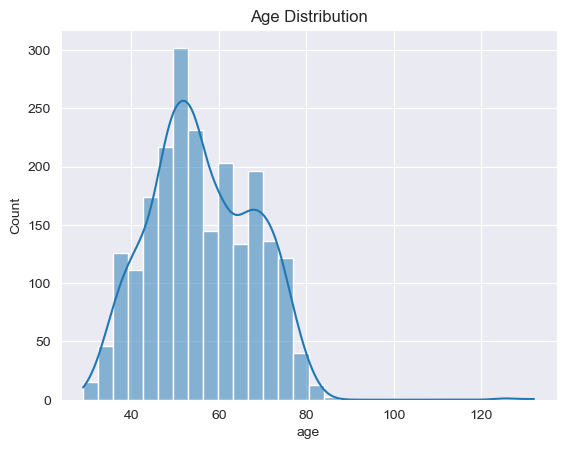

In [447]:
#Visualizations

# Now plot
sns.histplot(df["age"], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

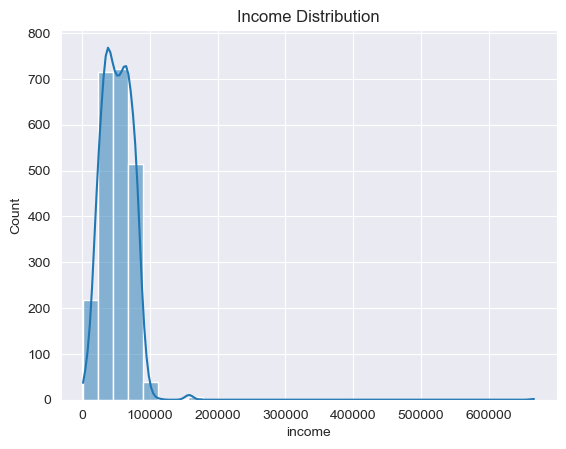

In [448]:
sns.histplot(df["income"], bins=30, kde=True)
plt.title("Income Distribution")
plt.show()


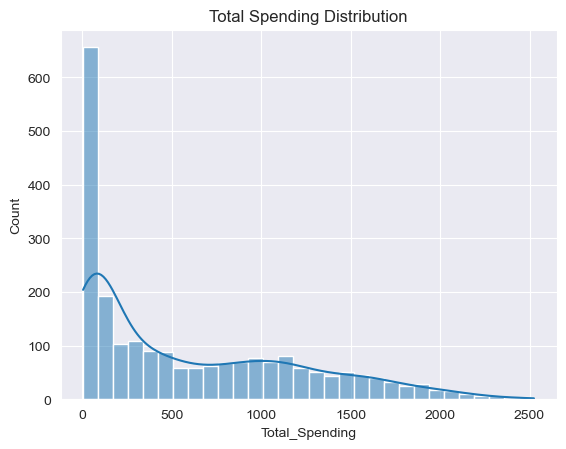

In [449]:
sns.histplot(df["Total_Spending"], bins=30, kde=True)
plt.title("Total Spending Distribution")
plt.show()

In [450]:
df.columns = df.columns.str.lower()


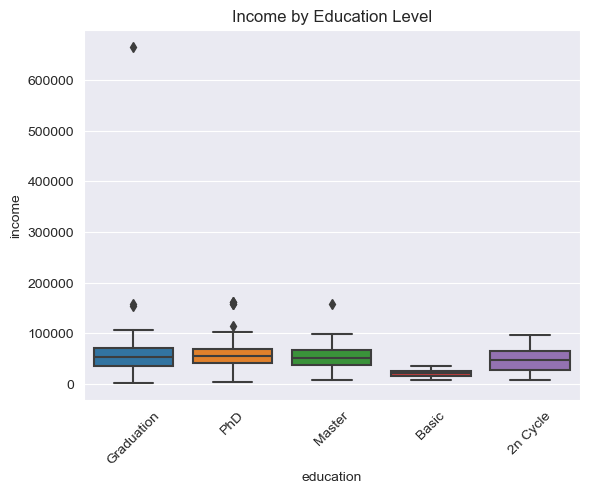

In [451]:
sns.boxplot(x="education", y="income", data=df)
plt.xticks(rotation=45)
plt.title("Income by Education Level")
plt.show()


In [452]:
df.columns = df.columns.str.lower()


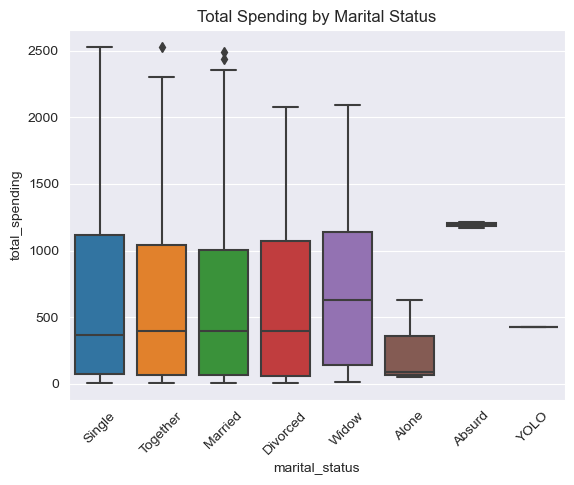

In [453]:
sns.boxplot(x="marital_status", y="total_spending", data=df)
plt.xticks(rotation=45)
plt.title("Total Spending by Marital Status")
plt.show()


In [454]:
df.columns

Index(['id', 'year_birth', 'education', 'marital_status', 'income', 'kidhome',
       'teenhome', 'dt_customer', 'recency', 'mntwines', 'mntfruits',
       'mntmeatproducts', 'mntfishproducts', 'mntsweetproducts',
       'mntgoldprods', 'numdealspurchases', 'numwebpurchases',
       'numcatalogpurchases', 'numstorepurchases', 'numwebvisitsmonth',
       'acceptedcmp3', 'acceptedcmp4', 'acceptedcmp5', 'acceptedcmp1',
       'acceptedcmp2', 'complain', 'z_costcontact', 'z_revenue', 'response',
       'age', 'total_children', 'total_spending'],
      dtype='object')

# 📊 Step 6:
Correlation Analysis

In [455]:
# Check column names first
print(df.columns.tolist())

# Then select the columns properly
cols = ["income", "age", "recency", "total_spending", "numwebpurchases", "numstorepurchases"]

# Compute correlation
corr = df[cols].corr()
print(corr)


['id', 'year_birth', 'education', 'marital_status', 'income', 'kidhome', 'teenhome', 'dt_customer', 'recency', 'mntwines', 'mntfruits', 'mntmeatproducts', 'mntfishproducts', 'mntsweetproducts', 'mntgoldprods', 'numdealspurchases', 'numwebpurchases', 'numcatalogpurchases', 'numstorepurchases', 'numwebvisitsmonth', 'acceptedcmp3', 'acceptedcmp4', 'acceptedcmp5', 'acceptedcmp1', 'acceptedcmp2', 'complain', 'z_costcontact', 'z_revenue', 'response', 'age', 'total_children', 'total_spending']
                     income       age   recency  total_spending  \
income             1.000000  0.161791 -0.003970        0.667576   
age                0.161791  1.000000  0.016295        0.113487   
recency           -0.003970  0.016295  1.000000        0.020066   
total_spending     0.667576  0.113487  0.020066        1.000000   
numwebpurchases    0.387878  0.153051 -0.005641        0.528973   
numstorepurchases  0.529362  0.127891 -0.000434        0.675181   

                   numwebpurchases  nu

In [456]:
corr

,income,age,recency,total_spending,numwebpurchases,numstorepurchases
income,1.000000,0.161791,-0.003970,0.667576,0.387878,0.529362
age,0.161791,1.000000,0.016295,0.113487,0.153051,0.127891
recency,-0.003970,0.016295,1.000000,0.020066,-0.005641,-0.000434
total_spending,0.667576,0.113487,0.020066,1.000000,0.528973,0.675181
numwebpurchases,0.387878,0.153051,-0.005641,0.528973,1.000000,0.516240
numstorepurchases,0.529362,0.127891,-0.000434,0.675181,0.516240,1.000000


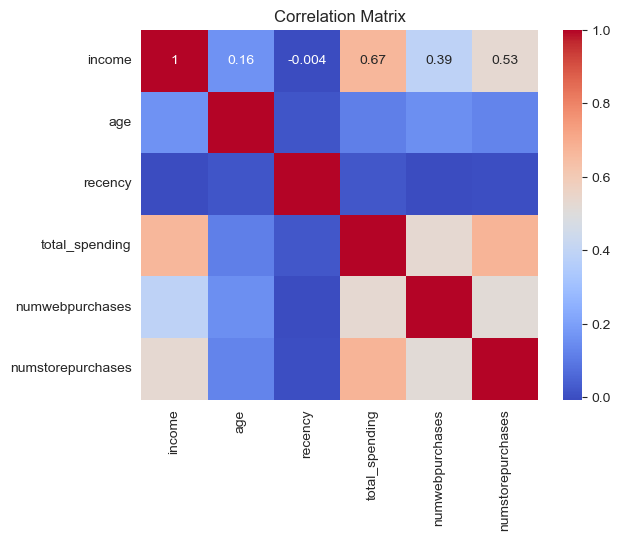

In [457]:
sns.heatmap(corr, annot=True, cmap = "coolwarm")
plt.title("Correlation Matrix")
plt.show()

# 📊 Step 7:
Grouping & Pivot Tables

In [458]:
#Average income by education & marital status

pivot_income = df.pivot_table(values="income", index="education", columns="marital_status", aggfunc= "mean")

In [459]:
pivot_income

marital_status,Absurd,Alone,Divorced,Married,Single,Together,Widow,YOLO
education,,,,,,,,
2n Cycle,NaN,NaN,49395.130435,46201.100000,53673.944444,44736.410714,51392.200000,NaN
Basic,NaN,NaN,9548.000000,21960.500000,18238.666667,21240.071429,22123.000000,NaN
Graduation,79244.0,34176.0,54526.042017,50800.258741,51322.182927,55758.480702,54976.657143,NaN
Master,65487.0,61331.0,50331.945946,53286.028986,53530.560000,52109.009804,58401.545455,NaN
PhD,NaN,35860.0,53096.615385,58138.031579,53314.614583,56041.422414,60288.083333,48432.0


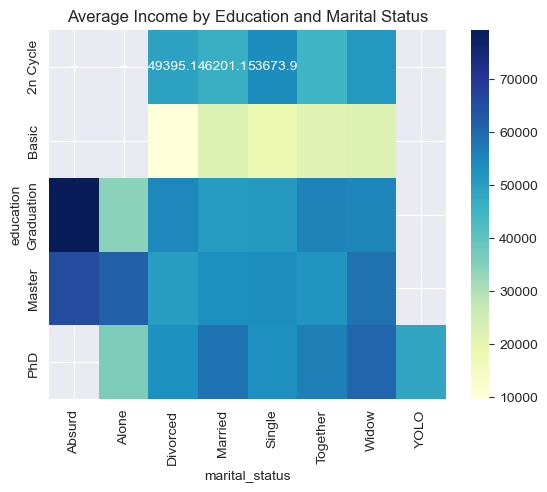

In [460]:
sns.heatmap(pivot_income, annot=True, fmt="g", cmap="YlGnBu")
plt.title("Average Income by Education and Marital Status")
plt.show()

In [461]:
group = df.groupby("education")["total_spending"].mean().sort_values(ascending=False)
print(group)

education
PhD           676.733888
Graduation    621.686380
Master        609.767123
2n Cycle      494.930000
Basic          81.796296
Name: total_spending, dtype: float64


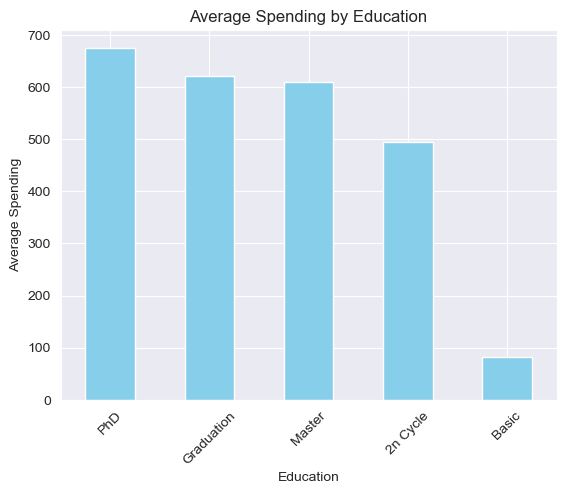

In [462]:
group.plot(kind="bar", color="skyblue")
plt.title("Average Spending by Education")
plt.ylabel("Average Spending")
plt.xlabel("Education")
plt.xticks(rotation=45)
plt.show()

In [463]:
# Sum all campaign acceptance columns (with lowercase names)
df["acceptedany"] = df[["acceptedcmp1","acceptedcmp2","acceptedcmp3","acceptedcmp4","acceptedcmp5","response"]].sum(axis=1)

In [464]:
# Check unique values
df["acceptedany"].unique()

array([1, 0, 3, 2, 4, 5], dtype=int64)

In [465]:
# If columns are lowercase
df["acceptedany"] = df["acceptedany"].apply(lambda x: 1 if x > 0 else 0)

In [466]:
df["acceptedany"].unique()

array([1, 0], dtype=int64)

In [467]:
group2 = df.groupby(df['marital_status'].str.strip())['acceptedany'].mean().sort_values(ascending=False)

In [468]:
group2

marital_status
Absurd      0.500000
YOLO        0.500000
Widow       0.342105
Alone       0.333333
Single      0.312102
Divorced    0.297414
Married     0.252042
Together    0.251309
Name: acceptedany, dtype: float64

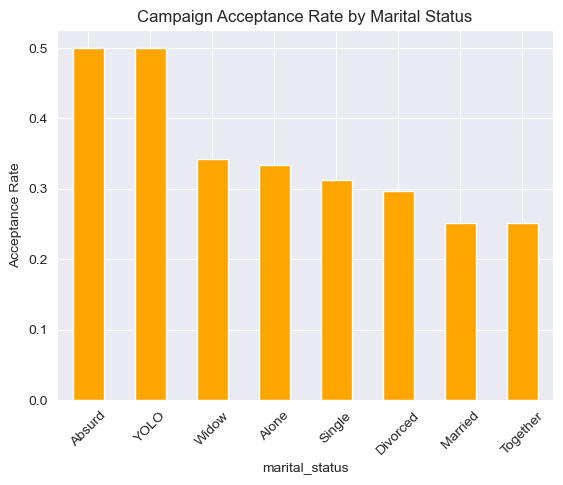

In [469]:
group2.plot(kind="bar", color="orange")
plt.title("Campaign Acceptance Rate by Marital Status")
plt.ylabel("Acceptance Rate")
plt.xticks(rotation=45)
plt.show()

# 🎯 Step 8:
Prepare Features for Clustering

In [470]:
# Example bins and labels
bins = [18, 30, 40, 50, 60, 70, 90]   # Adjust

In [471]:
#according to your age range
labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70+']

In [472]:
df["AgeGroup"] = pd.cut(df["age"], bins=bins, labels=labels)

In [473]:
df["AgeGroup"]

0       60-69
1         70+
2       50-59
3       40-49
4       40-49
        ...  
2235    50-59
2236      70+
2237    40-49
2238    60-69
2239      70+
Name: AgeGroup, Length: 2216, dtype: category
Categories (6, object): ['18-29' < '30-39' < '40-49' < '50-59' < '60-69' < '70+']

In [474]:
group3 = df.groupby("AgeGroup", observed=False)["income"].mean()


In [475]:
group3

AgeGroup
18-29    46658.000000
30-39    46283.028302
40-49    49224.877034
50-59    50812.913303
60-69    56200.827887
70+      58944.316294
Name: income, dtype: float64

Text(0.5, 0, 'Average Income')

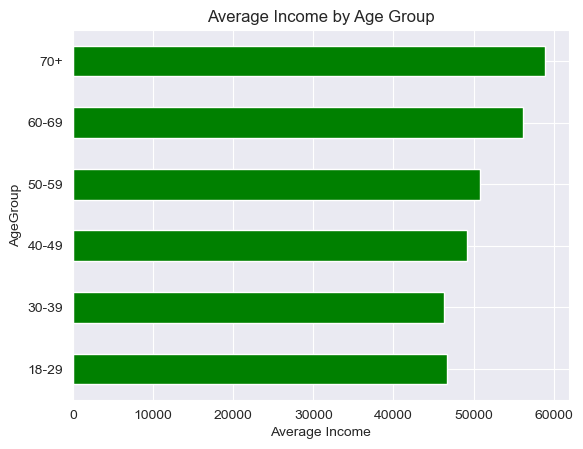

In [476]:
group3.plot(kind="barh", color="green")
plt.title("Average Income by Age Group")
plt.xlabel("Average Income")

In [477]:
df.columns

Index(['id', 'year_birth', 'education', 'marital_status', 'income', 'kidhome',
       'teenhome', 'dt_customer', 'recency', 'mntwines', 'mntfruits',
       'mntmeatproducts', 'mntfishproducts', 'mntsweetproducts',
       'mntgoldprods', 'numdealspurchases', 'numwebpurchases',
       'numcatalogpurchases', 'numstorepurchases', 'numwebvisitsmonth',
       'acceptedcmp3', 'acceptedcmp4', 'acceptedcmp5', 'acceptedcmp1',
       'acceptedcmp2', 'complain', 'z_costcontact', 'z_revenue', 'response',
       'age', 'total_children', 'total_spending', 'acceptedany', 'AgeGroup'],
      dtype='object')

In [478]:
features = [
    "age",
    "income",
    "total_spending",
    "numwebpurchases",
    "numstorepurchases",
    "numwebvisitsmonth",
    "recency"
]

In [479]:
x = df[features].copy()

In [480]:
x

,age,income,total_spending,numwebpurchases,numstorepurchases,numwebvisitsmonth,recency
0,68,58138.0,1617,8,4,7,58
1,71,46344.0,27,1,2,5,38
2,60,71613.0,776,8,10,4,26
3,41,26646.0,53,2,4,6,26
4,44,58293.0,422,5,6,5,94
...,...,...,...,...,...,...,...
2235,58,61223.0,1341,9,4,5,46
2236,79,64014.0,444,8,5,7,56
2237,44,56981.0,1241,2,13,6,91
2238,69,69245.0,843,6,10,3,8


# 🤖 Step 9:
Apply KMeans Clustering

In [481]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [482]:
x_scaled = scaler.fit_transform(x)

In [483]:
x_scaled

array([[ 0.98644293,  0.2340627 ,  1.67548812, ..., -0.55414289,
         0.69323197,  0.31053212],
       [ 1.23680074, -0.23455948, -0.96235832, ..., -1.16951781,
        -0.1315745 , -0.38050944],
       [ 0.31882209,  0.76947764,  0.28024985, ...,  1.29198186,
        -0.54397773, -0.79513438],
       ...,
       [-1.01641959,  0.18809052,  1.05169551, ...,  2.21504423,
         0.28082874,  1.4507507 ],
       [ 1.06989553,  0.67538765,  0.39140438, ...,  1.29198186,
        -0.95638097, -1.41707178],
       [ 1.23680074,  0.02470453, -0.7218    , ..., -0.55414289,
         0.69323197, -0.31140528]])

In [484]:
from sklearn.cluster import KMeans

WCSS = []

In [485]:
for i in range(2, 10):
    kmeans = KMeans(n_clusters=i, n_init=10, random_state=42)  # explicitly set n_init
    kmeans.fit(x_scaled)
    WCSS.append(kmeans.inertia_)

In [486]:
WCSS

[10218.620143748782,
 9007.783808892224,
 8158.828480264294,
 7567.254585943938,
 7008.220230804591,
 6650.514748483635,
 6156.086904304197,
 5854.134616763891]

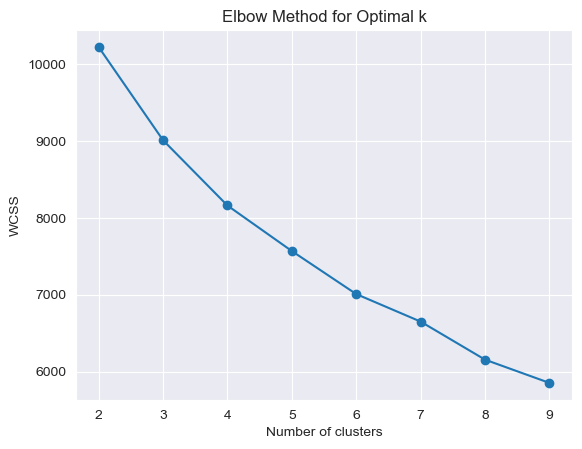

In [487]:
plt.plot(range(2, 10), WCSS, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of clusters")   # use xlabel, not xlab
plt.ylabel("WCSS")
plt.show()

In [488]:
# Create KMeans object with 6 clusters
kmeans = KMeans(n_clusters=6, n_init=10, random_state=42)  # set n_init and random_state

# Fit and predict clusters
df["cluster"] = kmeans.fit_predict(x_scaled)

In [489]:
# Check the first few rows
df["cluster"]

0       3
1       2
2       3
3       2
4       0
       ..
2235    3
2236    3
2237    1
2238    5
2239    2
Name: cluster, Length: 2216, dtype: int32

In [490]:
df.head()

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,...,complain,z_costcontact,z_revenue,response,age,total_children,total_spending,acceptedany,AgeGroup,cluster
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,3,11,1,68,0,1617,1,60-69,3
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,3,11,0,71,2,27,0,70+,2
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,3,11,0,60,0,776,0,50-59,3
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,3,11,0,41,1,53,0,40-49,2
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,3,11,0,44,1,422,0,40-49,0


In [491]:
cluster_summary = df.groupby("cluster")[features].mean()

In [492]:
cluster_summary

,age,income,total_spending,numwebpurchases,numstorepurchases,numwebvisitsmonth,recency
cluster,,,,,,,
0,54.972727,36243.583636,134.538182,2.398182,3.454545,6.487273,74.832727
1,46.653295,76281.948424,1305.865330,4.690544,8.733524,2.710602,49.530086
2,52.374778,34579.243339,120.447602,2.229130,3.369449,6.479574,23.991119
3,59.625899,59560.287770,878.223022,7.997602,7.767386,6.438849,46.808153
4,48.000000,666666.000000,62.000000,3.000000,3.000000,6.000000,23.000000
5,70.172619,72178.922619,1135.247024,4.476190,8.238095,2.779762,50.949405


In [493]:
df["cluster"].value_counts()

cluster
2    563
0    550
3    417
1    349
5    336
4      1
Name: count, dtype: int64

# 📊 Step 10:
Cluster Summary & PCA Visualization

In [494]:
from sklearn.decomposition import PCA

pca = PCA(n_components= 2)
pca_data = pca.fit_transform(x_scaled)
df["PCA1"], df["PCA2"] = pca_data[:,0], pca_data[:,1]

In [495]:
pca_data

array([[ 1.1075188 ,  0.21175951],
       [-1.33673385, -0.269839  ],
       [ 1.88227676,  1.01416098],
       ...,
       [ 1.1535966 , -1.15056999],
       [ 1.88768024,  1.16073698],
       [-0.84182091,  0.15963623]])

In [496]:
df["PCA1"]

0       1.107519
1      -1.336734
2       1.882277
3      -1.784359
4       0.020363
          ...   
2235    1.248177
2236    0.508708
2237    1.153597
2238    1.887680
2239   -0.841821
Name: PCA1, Length: 2216, dtype: float64

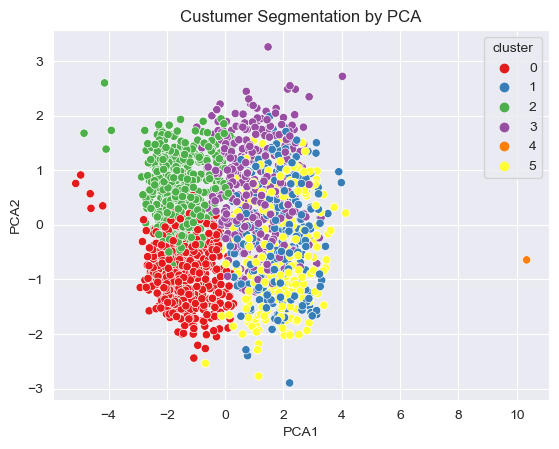

In [497]:
sns.scatterplot(x="PCA1", y="PCA2", hue="cluster", data=df, palette="Set1")
plt.title("Custumer Segmentation by PCA")
plt.show()
pca = PCA(n_components= 2)

In [498]:
cluster_summary

,age,income,total_spending,numwebpurchases,numstorepurchases,numwebvisitsmonth,recency
cluster,,,,,,,
0,54.972727,36243.583636,134.538182,2.398182,3.454545,6.487273,74.832727
1,46.653295,76281.948424,1305.865330,4.690544,8.733524,2.710602,49.530086
2,52.374778,34579.243339,120.447602,2.229130,3.369449,6.479574,23.991119
3,59.625899,59560.287770,878.223022,7.997602,7.767386,6.438849,46.808153
4,48.000000,666666.000000,62.000000,3.000000,3.000000,6.000000,23.000000
5,70.172619,72178.922619,1135.247024,4.476190,8.238095,2.779762,50.949405


# 🛠 Step 11:
 Save KMeans Model & Scaler

In [499]:
import joblib

# Save the KMeans model to a file
joblib.dump(kmeans, "Kmeans_model.pkl")


['Kmeans_model.pkl']

In [500]:
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']